# Linear regression With One Variable

In [2]:
data = np.loadtxt("ex1data1.txt", delimiter = ",", dtype = 'float')
print(data)

[[ 6.1101  17.592  ]
 [ 5.5277   9.1302 ]
 [ 8.5186  13.662  ]
 [ 7.0032  11.854  ]
 [ 5.8598   6.8233 ]
 [ 8.3829  11.886  ]
 [ 7.4764   4.3483 ]
 [ 8.5781  12.     ]
 [ 6.4862   6.5987 ]
 [ 5.0546   3.8166 ]
 [ 5.7107   3.2522 ]
 [14.164   15.505  ]
 [ 5.734    3.1551 ]
 [ 8.4084   7.2258 ]
 [ 5.6407   0.71618]
 [ 5.3794   3.5129 ]
 [ 6.3654   5.3048 ]
 [ 5.1301   0.56077]
 [ 6.4296   3.6518 ]
 [ 7.0708   5.3893 ]
 [ 6.1891   3.1386 ]
 [20.27    21.767  ]
 [ 5.4901   4.263  ]
 [ 6.3261   5.1875 ]
 [ 5.5649   3.0825 ]
 [18.945   22.638  ]
 [12.828   13.501  ]
 [10.957    7.0467 ]
 [13.176   14.692  ]
 [22.203   24.147  ]
 [ 5.2524  -1.22   ]
 [ 6.5894   5.9966 ]
 [ 9.2482  12.134  ]
 [ 5.8918   1.8495 ]
 [ 8.2111   6.5426 ]
 [ 7.9334   4.5623 ]
 [ 8.0959   4.1164 ]
 [ 5.6063   3.3928 ]
 [12.836   10.117  ]
 [ 6.3534   5.4974 ]
 [ 5.4069   0.55657]
 [ 6.8825   3.9115 ]
 [11.708    5.3854 ]
 [ 5.7737   2.4406 ]
 [ 7.8247   6.7318 ]
 [ 7.0931   1.0463 ]
 [ 5.0702   5.1337 ]
 [ 5.8014   1

# 2.1 Plotting the Data

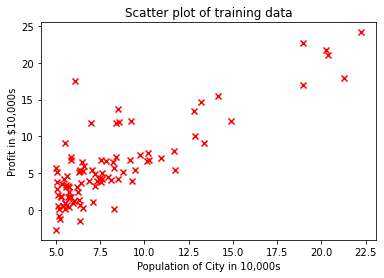

In [3]:
import matplotlib.pyplot as plt

X, y = np.loadtxt('ex1data1.txt', delimiter=',', unpack=True)
plt.scatter(X,y, color = 'red', marker="x", label='Data')

plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.title('Scatter plot of training data')
plt.show()

# 2.2 Gradient Desent

In [4]:
theta = np.zeros((2,1))
iterations = 1500
learning_rate = 0.01
print(theta)

[[0.]
 [0.]]


# Computing the Cost J(theta)

In [5]:
def J_Cost(X,y,theta):
    m = len(y)
    J = X.dot(theta)
    J = (1/(2*m)) *np.sum(((J-y)**2))
    return J

In [6]:
m = len(X)
X = data[:,0]
X = X.reshape(m,1)
X = np.append(np.ones((m,1)),X, axis=1)
y = data[:,1].reshape(m, 1)

print('J_Cost = ', J_Cost(X,y,theta))

J_Cost =  32.072733877455676


In [7]:
X.shape

(97, 2)

In [8]:
y.shape

(97, 1)

In [9]:
def gradientDescent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_list= []
 
    for i in range(0,iterations):
        cost = np.dot(X,theta) - y
        cost = np.dot(X.transpose(), cost)
        d_theta = (1/m)*cost
        theta = theta - (learning_rate)*d_theta
        
        cost_list.append(J_Cost(X,y,theta))
    return theta, cost_list

In [10]:
theta, cost_list = gradientDescent(X, y, theta, learning_rate, iterations)

Text(0.5, 1.0, 'Cost function using Gradient Descent')

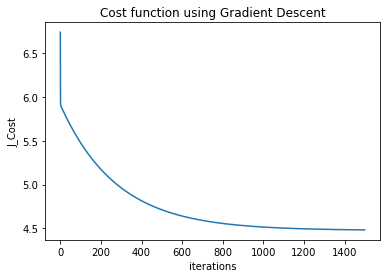

In [11]:
plt.plot(cost_list)
plt.xlabel("iterations")
plt.ylabel ("J_Cost")
plt.title ("Cost function using Gradient Descent")

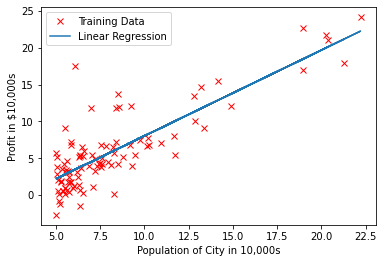

In [12]:
f = np.dot(X,theta)
plt.plot (X[:,1],y, "rx" )
plt.plot (X[:,1],f)
plt.xlabel ("Population of City in 10,000s")
plt.ylabel ("Profit in $10,000s")
plt.legend(['Training Data', 'Linear Regression'])

# 2.4 Visualizing J(theta)

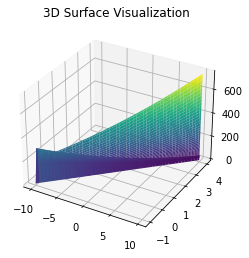

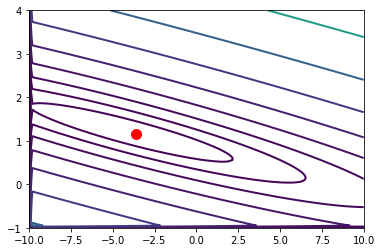

In [13]:
from mpl_toolkits import mplot3d

theta0 = np.linspace(-10,10,100)
theta1 = np.linspace(-1,4,100)
cost_list_val = np.zeros((len(theta0),len(theta1)))
for i in range(1,len(theta0)):
    for j in range(1,len(theta1)):
        t = np.asarray([[theta0[i]],[theta1[j]]])
        cost_list_val[i][j] = J_Cost(X,y,t)
        
cost_list_val = cost_list_val.transpose()

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(theta0, theta1, cost_list_val, cmap='viridis', edgecolor='none')
ax.set_title('3D Surface Visualization')
plt.show()
plt.contour(theta0, theta1, cost_list_val, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
plt.plot(theta[0], theta[1], 'ro', ms=10, lw=2)

# 3 Linear Regression with Multiple Variables

In [14]:
data2 = np.loadtxt("ex1data2.txt", delimiter = ",", dtype = 'int')
print(data2)

[[  2104      3 399900]
 [  1600      3 329900]
 [  2400      3 369000]
 [  1416      2 232000]
 [  3000      4 539900]
 [  1985      4 299900]
 [  1534      3 314900]
 [  1427      3 198999]
 [  1380      3 212000]
 [  1494      3 242500]
 [  1940      4 239999]
 [  2000      3 347000]
 [  1890      3 329999]
 [  4478      5 699900]
 [  1268      3 259900]
 [  2300      4 449900]
 [  1320      2 299900]
 [  1236      3 199900]
 [  2609      4 499998]
 [  3031      4 599000]
 [  1767      3 252900]
 [  1888      2 255000]
 [  1604      3 242900]
 [  1962      4 259900]
 [  3890      3 573900]
 [  1100      3 249900]
 [  1458      3 464500]
 [  2526      3 469000]
 [  2200      3 475000]
 [  2637      3 299900]
 [  1839      2 349900]
 [  1000      1 169900]
 [  2040      4 314900]
 [  3137      3 579900]
 [  1811      4 285900]
 [  1437      3 249900]
 [  1239      3 229900]
 [  2132      4 345000]
 [  4215      4 549000]
 [  2162      4 287000]
 [  1664      2 368500]
 [  2238      3 

In [15]:
X2 = data2[:,:2]
y2 = data2[:,-1]

m2 = len(X2)
X2.shape

(47, 2)

# 3.1 Feature Normalization

In [16]:
def featureNormalize(X2):
    mean = np.mean(X2)
    std = np.std(X2)
    res = X2-mean/std
    
    return res

In [17]:
X2 = featureNormalize(X2)
X2= np.append (np.ones((m2,1)),X2,axis=1)
y2 = y2.reshape(m2,1)
theta1 = np.zeros((3,1))
print(y2.shape)
print (X2.shape)

(47, 1)
(47, 3)


# 3.2 Gradient Descent

In [18]:
def J_Cost2(X2,y2,theta2):
    m2 = len(y2)
    J2 = X.dot(theta2)
    J2 = (1/(2*m2)) *np.sum(((J2-y2)**2))
    return J2

In [ ]:
theta2 = np.zeros((3, 1))
alpha = 0.01
num_iters = 1000

print('J_Cost = ', J_Cost2(X2,y2,theta2))

In [24]:
def gradientDescent(X2, y2, theta2, learning_rate, iterations):
    m2 = len(y2)
    cost_list2= []
    
    for i in range(iterations):
        cost2 = np.dot(X2,theta2) - y2
        cost2 = np.dot(X2.transpose(), cost2)
        d_theta2 = (1/m)*cost2
        theta2 = theta2 - (learning_rate)*d_theta2
        
        cost_list2.append(J_Cost(X2,y2,theta2))
        
    return theta2, cost_list2

In [ ]:
theta2, cost_list2 = gradientDescent(X2, y2, theta2, alpha, num_iters)

In [ ]:
plt.plot(cost_list2)
plt.xlabel("iterations")
plt.ylabel ("J_Cost")
plt.title ("Cost function using Gradient Descent")